Citations: Andrew Lucas: Ising formulations of many NP Problems. arXiv:1302.5843. 
https://arxiv.org/abs/1302.5843

Ising machine: Number Partitioning

Number partitioning is an algorithm which partitions a set of numbers into two
sets such that both sets add up to the same amount. 

In [117]:
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
import numba
import math


In [118]:
# generate a random set of N positive whole numbers
def generate_data(N):
    return np.random.randint(1, N, N) # low, high, size

N = 1000
data = generate_data(N)
print("data: ", data)
print("length:", len(data))
print("Data generated.")

data:  [ 27 505 701  10 618 619 722 717  75 777 865 651 160 590  83 765 989 145
 283 678 256 489 263  55 446 945   9 110 182 868 417 770 387  91 273 591
 255  99 292 210 271 972 975 151 875 566 220 505 785 121 996  33 422 894
 623 495 760 789  81 153 311 693 816 150 593 629 976 133 631 194 292  26
 375  71 951 509  42 413 341  53 845 611 656 759 583 221 561 893 926 728
 153 596 858 618 297  12 344 378 608 643 216 999 711 317  44 402 659 412
 437 891 257 561 591  57 107 997 156 405 567 427 412 226 885 678 624 372
 695 504  18 664  27 667 548 625 948 167 224 861 344 368 963 880 269 889
 353 592 386 773 415 139 782 396 846 105 471 145 484 136 486 175  58 121
 277 424 554 888 435 390 295 333 301  15 419 155 488 343 527 131 161 475
 182 125  81  65 607 284 842 244  26 963 652 299  57 621 644 608 132 933
 665 152 593 828 619 274 685 947 849 392 943 118  49 495 788 101 630 962
 194 374   9 106  63 353 410 810 648 722 643 308 427 645 220 107 452  69
 885 179  24 992 342 678 658 883 523  68 677

In [119]:
# generate an initial N x 1 vector of spins which are -1 or 1
@numba.njit
def generate_spins(N):
    return np.random.choice(np.array([-1, 1], dtype=np.int64), size=N) # 1D array, size. generates random sample

vector = generate_spins(N)
print(vector)

[ 1  1 -1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1
  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1
 -1 -1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1
 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1
  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1
  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1
 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1
 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1
 -1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1
  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1
 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1

In [120]:
from numba.typed import List
# partitions numbers randomly into two groups based on the spin vector
@numba.njit(nopython=True)
def get_groups(numbers_set, spin_vector):
    N = len(spin_vector)
    
    set_A = List()
    set_B = List()

    for n in range(N):
        if spin_vector[n] == 1:
            set_A.append(numbers_set[n])
        elif spin_vector[n] == -1: 
            set_B.append(numbers_set[n])
    return set_A, set_B

@numba.njit(nopython=True)
def get_sums(set_A, set_B):
    sum_A = 0
    sum_B = 0
    for a in set_A:
        sum_A += a
    for b in set_B:
        sum_B += b   
    return sum_A, sum_B

set_A, set_B = get_groups(data, vector) # data, vector generated previously

print("set A: ", set_A)
print("set_B", set_B)

sum_A, sum_B = get_sums(set_A, set_B)
print("sum A: ", sum_A)
print("sum B: ", sum_B)

set A:  [27, 505, 10, 722, 717, 865, 651, 160, 590, 989, 283, 678, 256, 489, 263, 55, 446, 9, 868, 91, 591, 99, 292, 271, 972, 975, 875, 566, 505, 996, 81, 153, 311, 693, 593, 976, 133, 631, 194, 26, 951, 509, 341, 611, 759, 583, 221, 561, 893, 728, 153, 596, 858, 297, 378, 643, 216, 999, 711, 317, 44, 402, 412, 891, 561, 591, 107, 567, 226, 504, 664, 27, 667, 948, 167, 861, 344, 889, 353, 592, 386, 773, 139, 782, 396, 846, 105, 484, 136, 486, 121, 424, 554, 295, 301, 419, 343, 527, 131, 161, 475, 182, 125, 81, 607, 842, 244, 26, 963, 652, 644, 132, 933, 665, 593, 828, 619, 274, 849, 118, 788, 101, 630, 962, 106, 353, 410, 427, 107, 885, 24, 992, 678, 883, 523, 677, 959, 642, 68, 241, 883, 571, 278, 567, 419, 17, 850, 841, 42, 232, 228, 169, 65, 170, 228, 329, 842, 754, 961, 299, 203, 481, 576, 34, 27, 230, 194, 3, 490, 77, 602, 999, 970, 960, 708, 202, 547, 865, 993, 149, 304, 276, 692, 93, 832, 981, 146, 119, 37, 359, 188, 612, 519, 56, 151, 935, 726, 195, 771, 897, 807, 369, 82, 135

/Users/aliya/DIMPLE/isingmodel/.venv/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [121]:
def outer_prod(data):
    S = np.array(data)
    N = len(S)
    J = np.outer(S, S)
    
    return J

# J = outer_prod(data)
print("J:", J)
# A is a constant for the Hamiltonian
A = 1

# H(s) = s^T * J * s
def compute_init_energy(J, s):
    return s @ J @ s # dimensions are handled automatically.


def compute_delta_energy(a, s, i):
    summation = np.sum(a[i] * a * s) # sum across all j 
    return - 2 * s[i] * summation

J: [[ 361 1805 1729 ... 1121  513  969]
 [1805 9025 8645 ... 5605 2565 4845]
 [1729 8645 8281 ... 5369 2457 4641]
 ...
 [1121 5605 5369 ... 3481 1593 3009]
 [ 513 2565 2457 ... 1593  729 1377]
 [ 969 4845 4641 ... 3009 1377 2601]]


In [122]:
@numba.jit(nopython=True)
def compute_sum_difference(a_vector, spin_vector):
    # we trivially define the energy as the absolute value of the difference in
    # sum between the two sets
    set_A, set_B = get_groups(a_vector, spin_vector)
    sum_A, sum_B = get_sums(set_A, set_B)
    return abs(sum_A - sum_B)

print("Initial energy:", compute_sum_difference(data, vector))




Initial energy: 28912


In [125]:
@numba.njit(
    numba.types.Tuple((
        numba.types.int64[:],  
        numba.types.int64,   
        numba.types.int64,   
        numba.types.int64[:],  
        numba.types.ListType(numba.types.int64),  
        numba.types.ListType(numba.types.int64)   
    ))(
        numba.types.int64[:],  
        numba.types.int64[:],  
        numba.types.float64,     
        numba.types.int64       
    ),
    nopython=True, parallel=True, fastmath=True, nogil=True
)
# nopython - native types must be inferred by compiler. Python C API is not accessed. 
def metropolis(a_vector, spin_vector, temp, num_steps):
    N = len(a_vector)
    # J = outer_prod(a_vector)  # Compute the outer product of the data vector
    E_i = compute_sum_difference(a_vector, spin_vector)  # Initial energy difference
    current_energy = E_i  # Current energy difference, scalars are immutable
    lowest_energy = current_energy
    best_sort = spin_vector.copy()
    print("Initial energy:", current_energy)

    current_energies = List()
    best_energies = List()
    

    for step in range(num_steps):
        # choose a random number to switch into the other group
        i = np.random.randint(0, N)
        spin_vector[i] *= -1
        # compute the change in energy that would result from flipping to the
        # other group
        new_E = compute_sum_difference(a_vector, spin_vector)
        # print delta_E for first couple of steps only, debugging
        if step < 10:
            print(f"Step {step}: new_E = {new_E}")

        # if difference in sums is less than curr difference in sums, apply this
        # change or accept it with a probability

        if (new_E < current_energy) or (np.random.rand() < np.exp(-new_E / temp)):
            if step < 10:
                print("Accepted this delta!")
            # if the energy change is negative, accept the change or accept with a probability.
            # if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / temp):
            current_energy = new_E  # Update the current energy
            # If the current energy is lower than the best found so far
            if new_E < lowest_energy:
                lowest_energy = current_energy
                best_sort = spin_vector.copy()
        else:
            # flip the spin back to its original state
            spin_vector[i] *= -1  # Revert the spin change

        # Store the current energy for plotting or analysis
        current_energies.append(current_energy)
        best_energies.append(lowest_energy)

    return best_sort, lowest_energy, current_energy, spin_vector, current_energies, best_energies


temp = 0.5
num_steps = 100
spin_vector = generate_spins(N)
a_vector = generate_data(N)

# Initial Groups and Sums
set_A, set_B = get_groups(a_vector, spin_vector)
sum_A, sum_B = get_sums(set_A, set_B)

print("Initial sum A:", sum_A)
print("Initial sum B:", sum_B)
print("Initial absolute difference:", np.absolute(sum_A - sum_B))


best_spin_vec, best_energy, current_energy, current_spin_vec, curr_energies, best_energies = metropolis(a_vector, spin_vector, temp, num_steps)

# print("Best sort:", best_sort)
print("Best energy:", best_energy)
print("Current energy:", current_energy)
# print("Final spin vector:", spin_vec)

# find the groups and sums
set_A, set_B = get_groups(a_vector, current_spin_vec)
sum_A, sum_B = get_sums(set_A, set_B)


print("Final sum A:", sum_A)
print("Final sum B:", sum_B)
print("Final absolute difference:", np.absolute(sum_A - sum_B))

# best results
set_A, set_B = get_groups(a_vector, best_spin_vec)
sum_A, sum_B = get_sums(set_A, set_B)

print("Best sum A:", sum_A)
print("Best sum B:", sum_B)
print("Best absolute difference:", np.absolute(sum_A - sum_B))



/Users/aliya/DIMPLE/isingmodel/.venv/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/aliya/DIMPLE/isingmodel/.venv/lib/python3.11/site-packages/numba/core/typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../var/folders/m8/l24rcsrx7cndr07cnvmy2c6c0000gn/T/ipykernel_29814/2195249962.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaPerformanceWarning(msg,


Initial sum A: 243545
Initial sum B: 261681
Initial absolute difference: 18136
Initial energy: 18136
Step 0: new_E = 17288
Accepted this delta!
Step 1: new_E = 16336
Accepted this delta!
Step 2: new_E = 18080
Step 3: new_E = 15414
Accepted this delta!
Step 4: new_E = 15464
Step 5: new_E = 16366
Step 6: new_E = 16352
Step 7: new_E = 17240
Step 8: new_E = 16796
Step 9: new_E = 16132
Best energy: 58
Current energy: 58
Final sum A: 252642
Final sum B: 252584
Final absolute difference: 58
Best sum A: 252642
Best sum B: 252584
Best absolute difference: 58


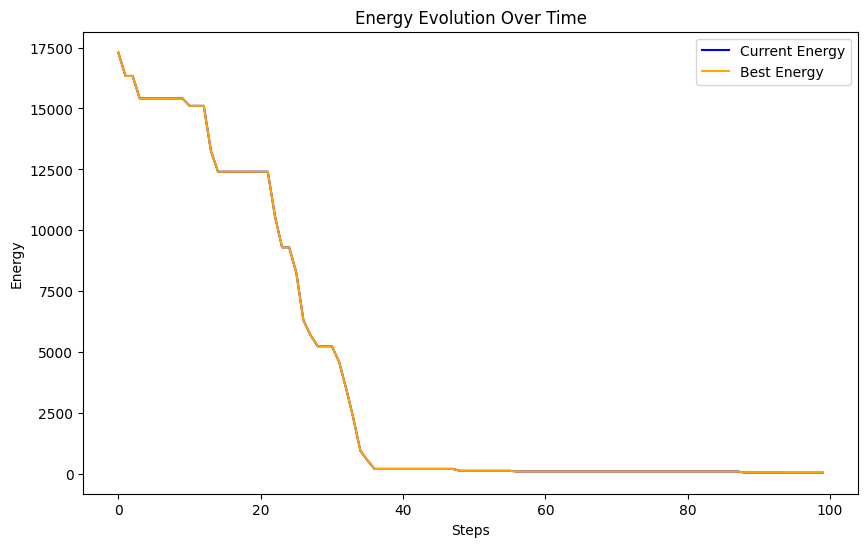

In [126]:
# Plotting the results, how the current and best energy change over time steps
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), curr_energies, label='Current Energy', color='blue')
plt.plot(range(num_steps), best_energies, label='Best Energy', color='orange')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.title('Energy Evolution Over Time')
plt.legend()
plt.show()